# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path

players = 10


def prepare_scoreboards(defeat_, draw_, victory_):
    scoreboards_ = pd.concat([defeat_, draw_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
draw = pd.read_csv(datapath + 'draw.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, draw, victory)
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = scoreboards['D'].max()
scoreboards

E   A   D   DMG     H   MIT    GAME
0   0   7   3   6  5933  1068  6199  DEFEAT
    1   7   0  10  3601   747     0  DEFEAT
    2   9   1   6  4352     0     0  DEFEAT
    3   7   7   2  2332  6325     0  DEFEAT
    4   6   4   2  3410  5979   606  DEFEAT
...    ..  ..  ..   ...   ...   ...     ...
301 5  13   1   3  8257     0  8900  DEFEAT
    6   8   5   5  5701   206   333  DEFEAT
    7  14   3   5  8163   324   859  DEFEAT
    8   4  14   5  1477  8604     0  DEFEAT
    9   4   7   5  1725  8994   918  DEFEAT

[3020 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3020 entries, (0, 0) to (301, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       3020 non-null   int64 
 1   A       3020 non-null   int64 
 2   D       3020 non-null   int64 
 3   DMG     3020 non-null   int64 
 4   H       3020 non-null   int64 
 5   MIT     3020 non-null   int64 
 6   GAME    3020 non-null   object
dtypes: int64(6), object(1)
memory usage: 184.9+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000
mean,13.436755,7.177815,6.369205,6130.931788,3854.761921,2302.383775
std,10.016133,8.489955,4.017572,4551.960836,5607.312655,4647.194165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,3.000000,2575.000000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5242.500000,744.000000,263.000000
75%,19.000000,11.000000,9.000000,9054.250000,7296.500000,1736.250000
max,56.000000,48.000000,21.000000,29354.000000,130174.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
tank = scoreboards[::players]
damage = pd.concat([scoreboards[1::players], scoreboards[2::players]])
support = pd.concat([scoreboards[3::players], scoreboards[4::players]])

그림 저장:tank_hist


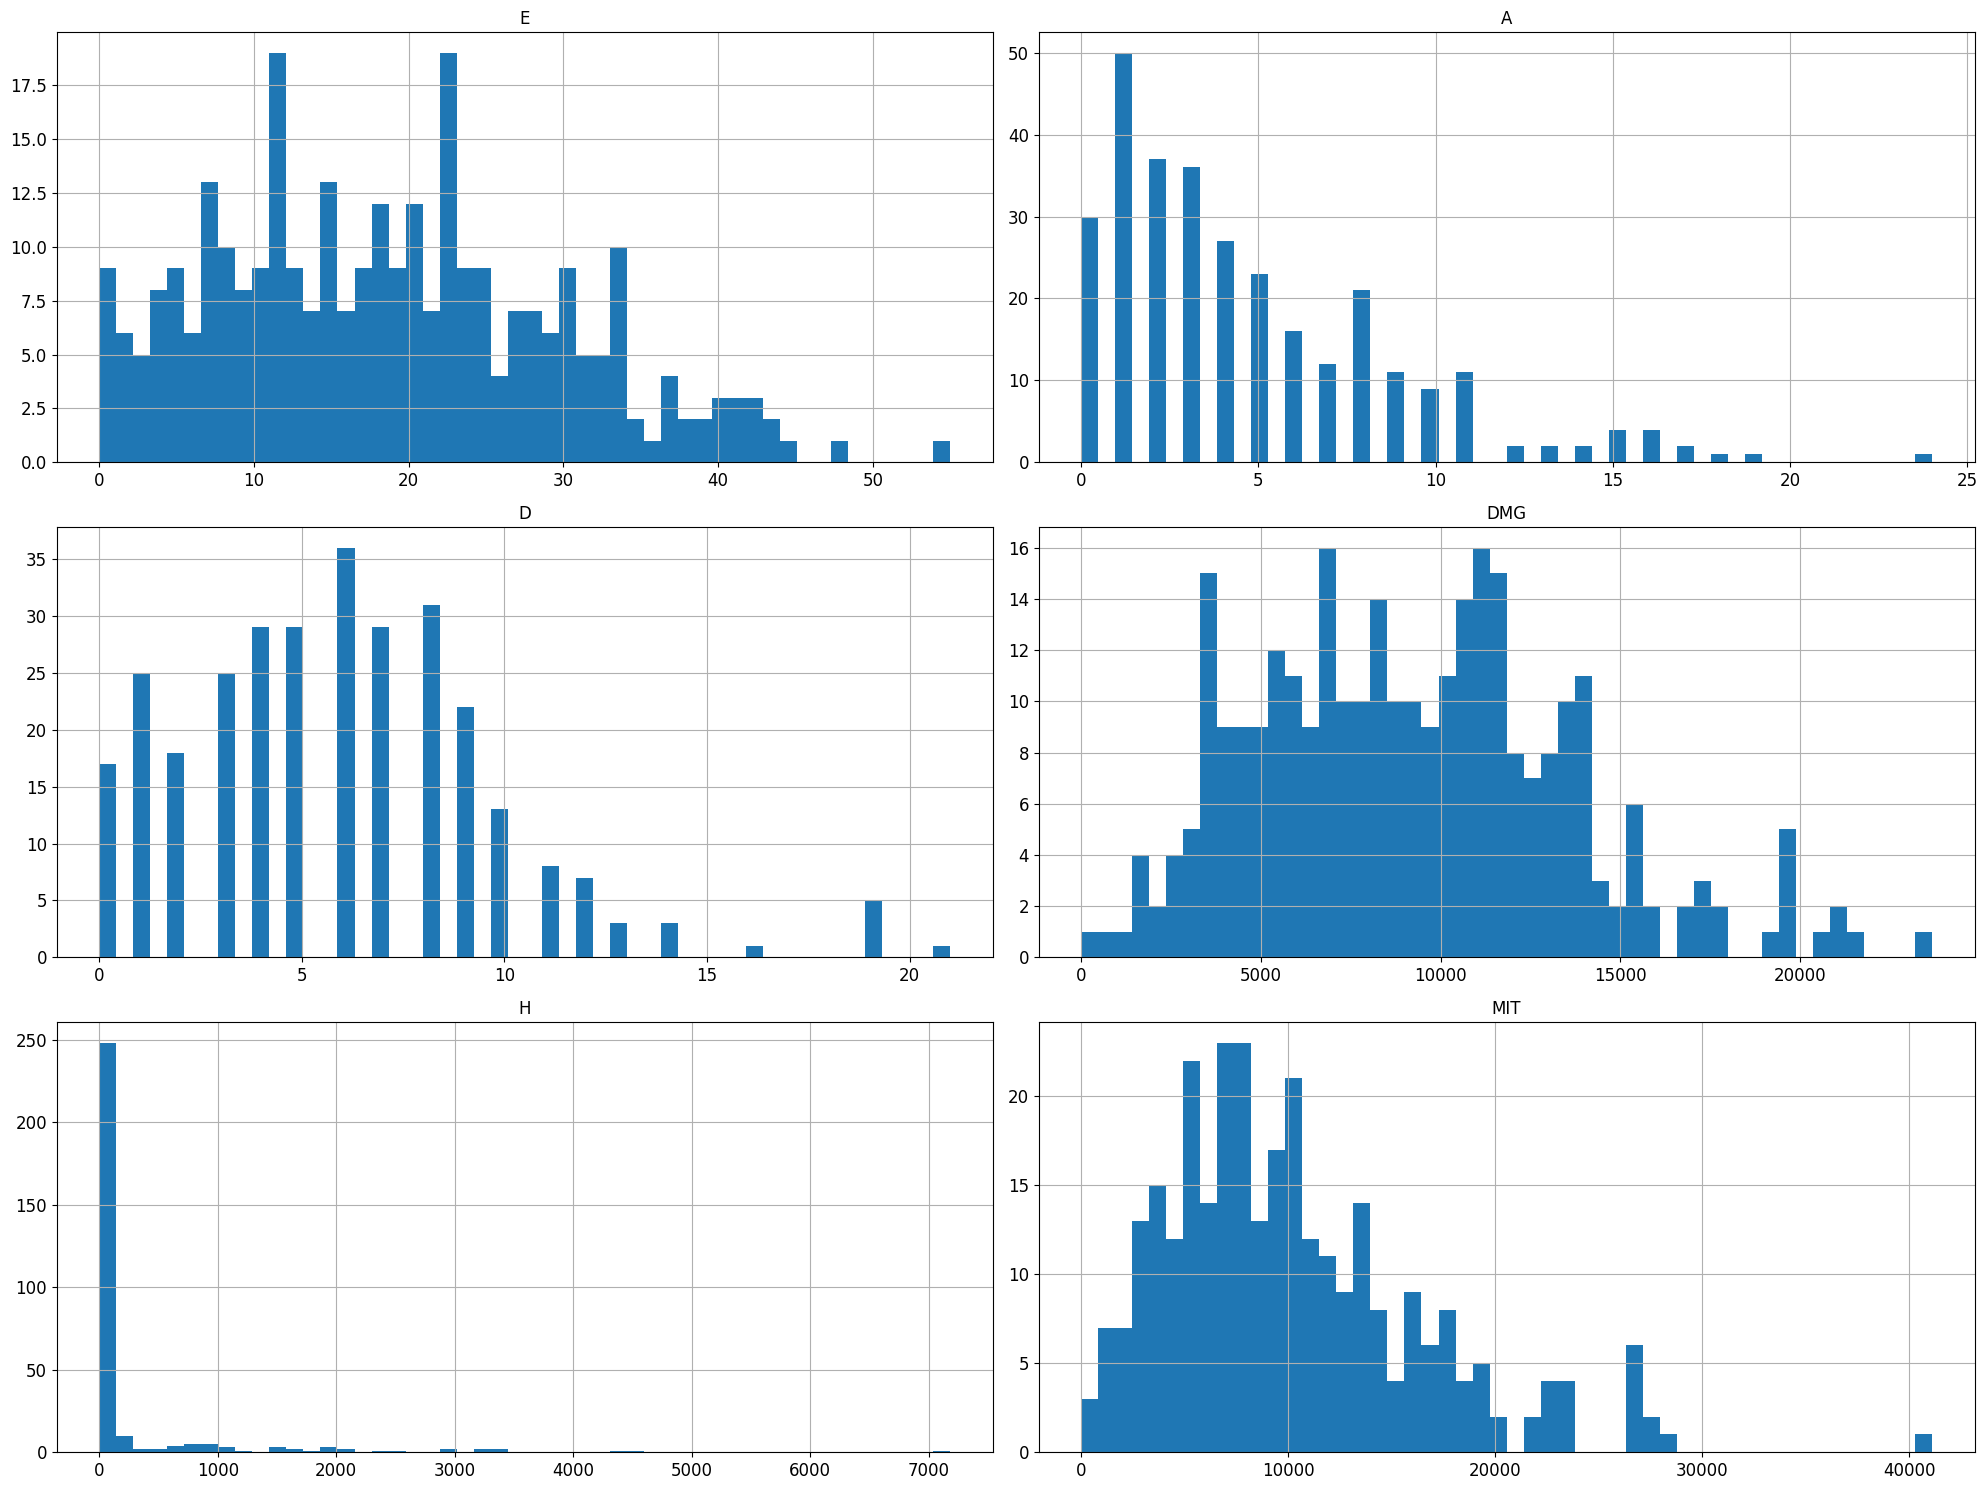

In [6]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


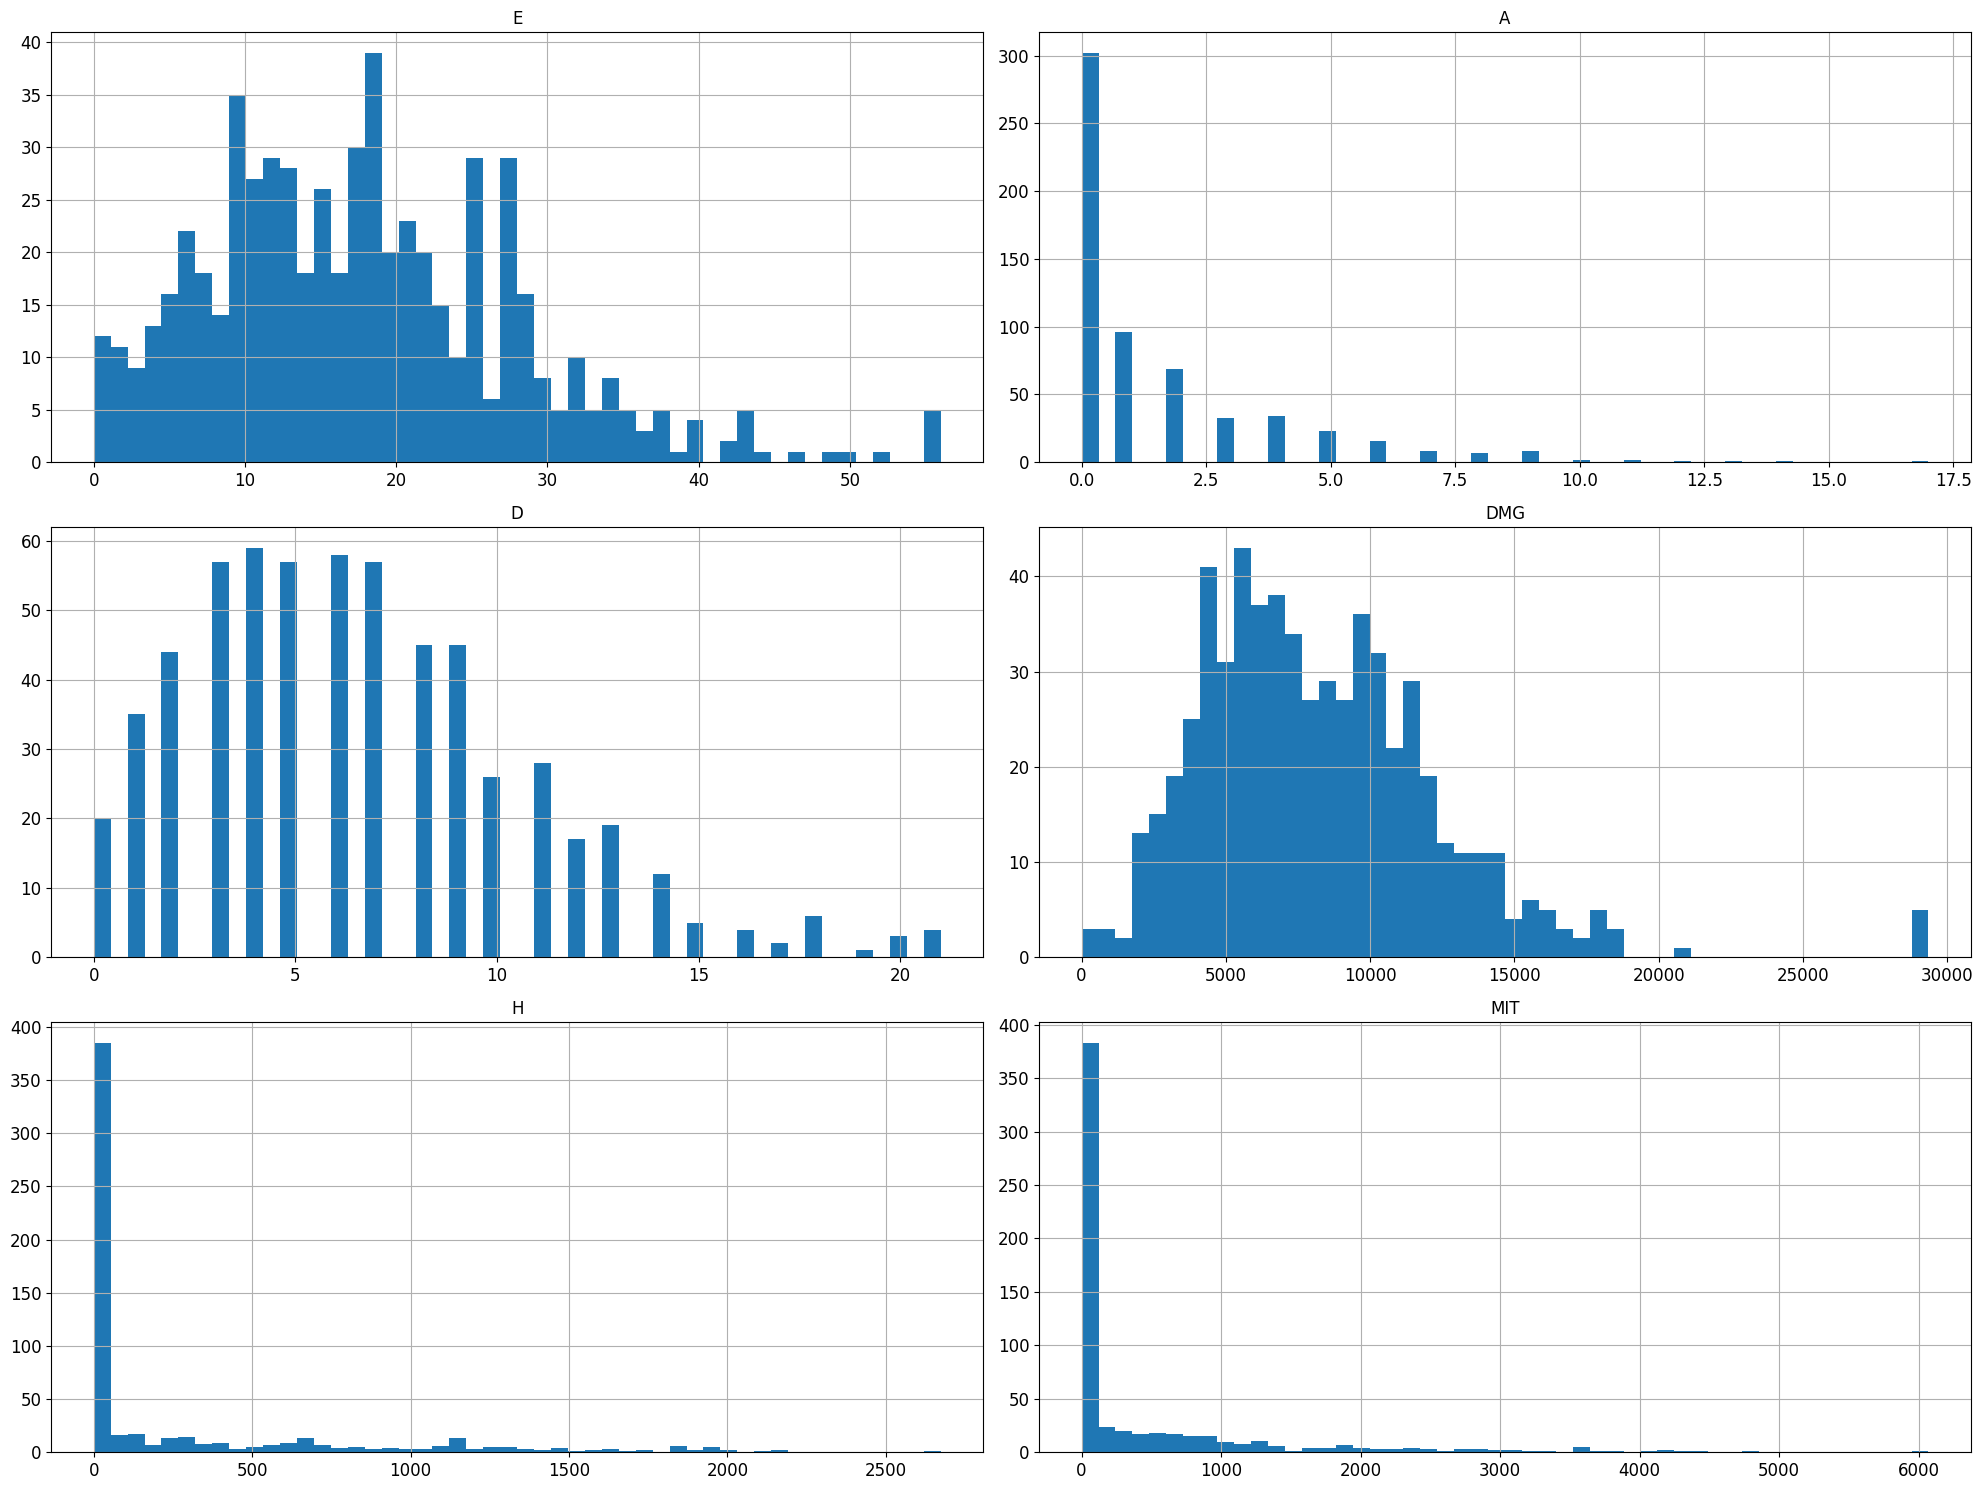

In [7]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


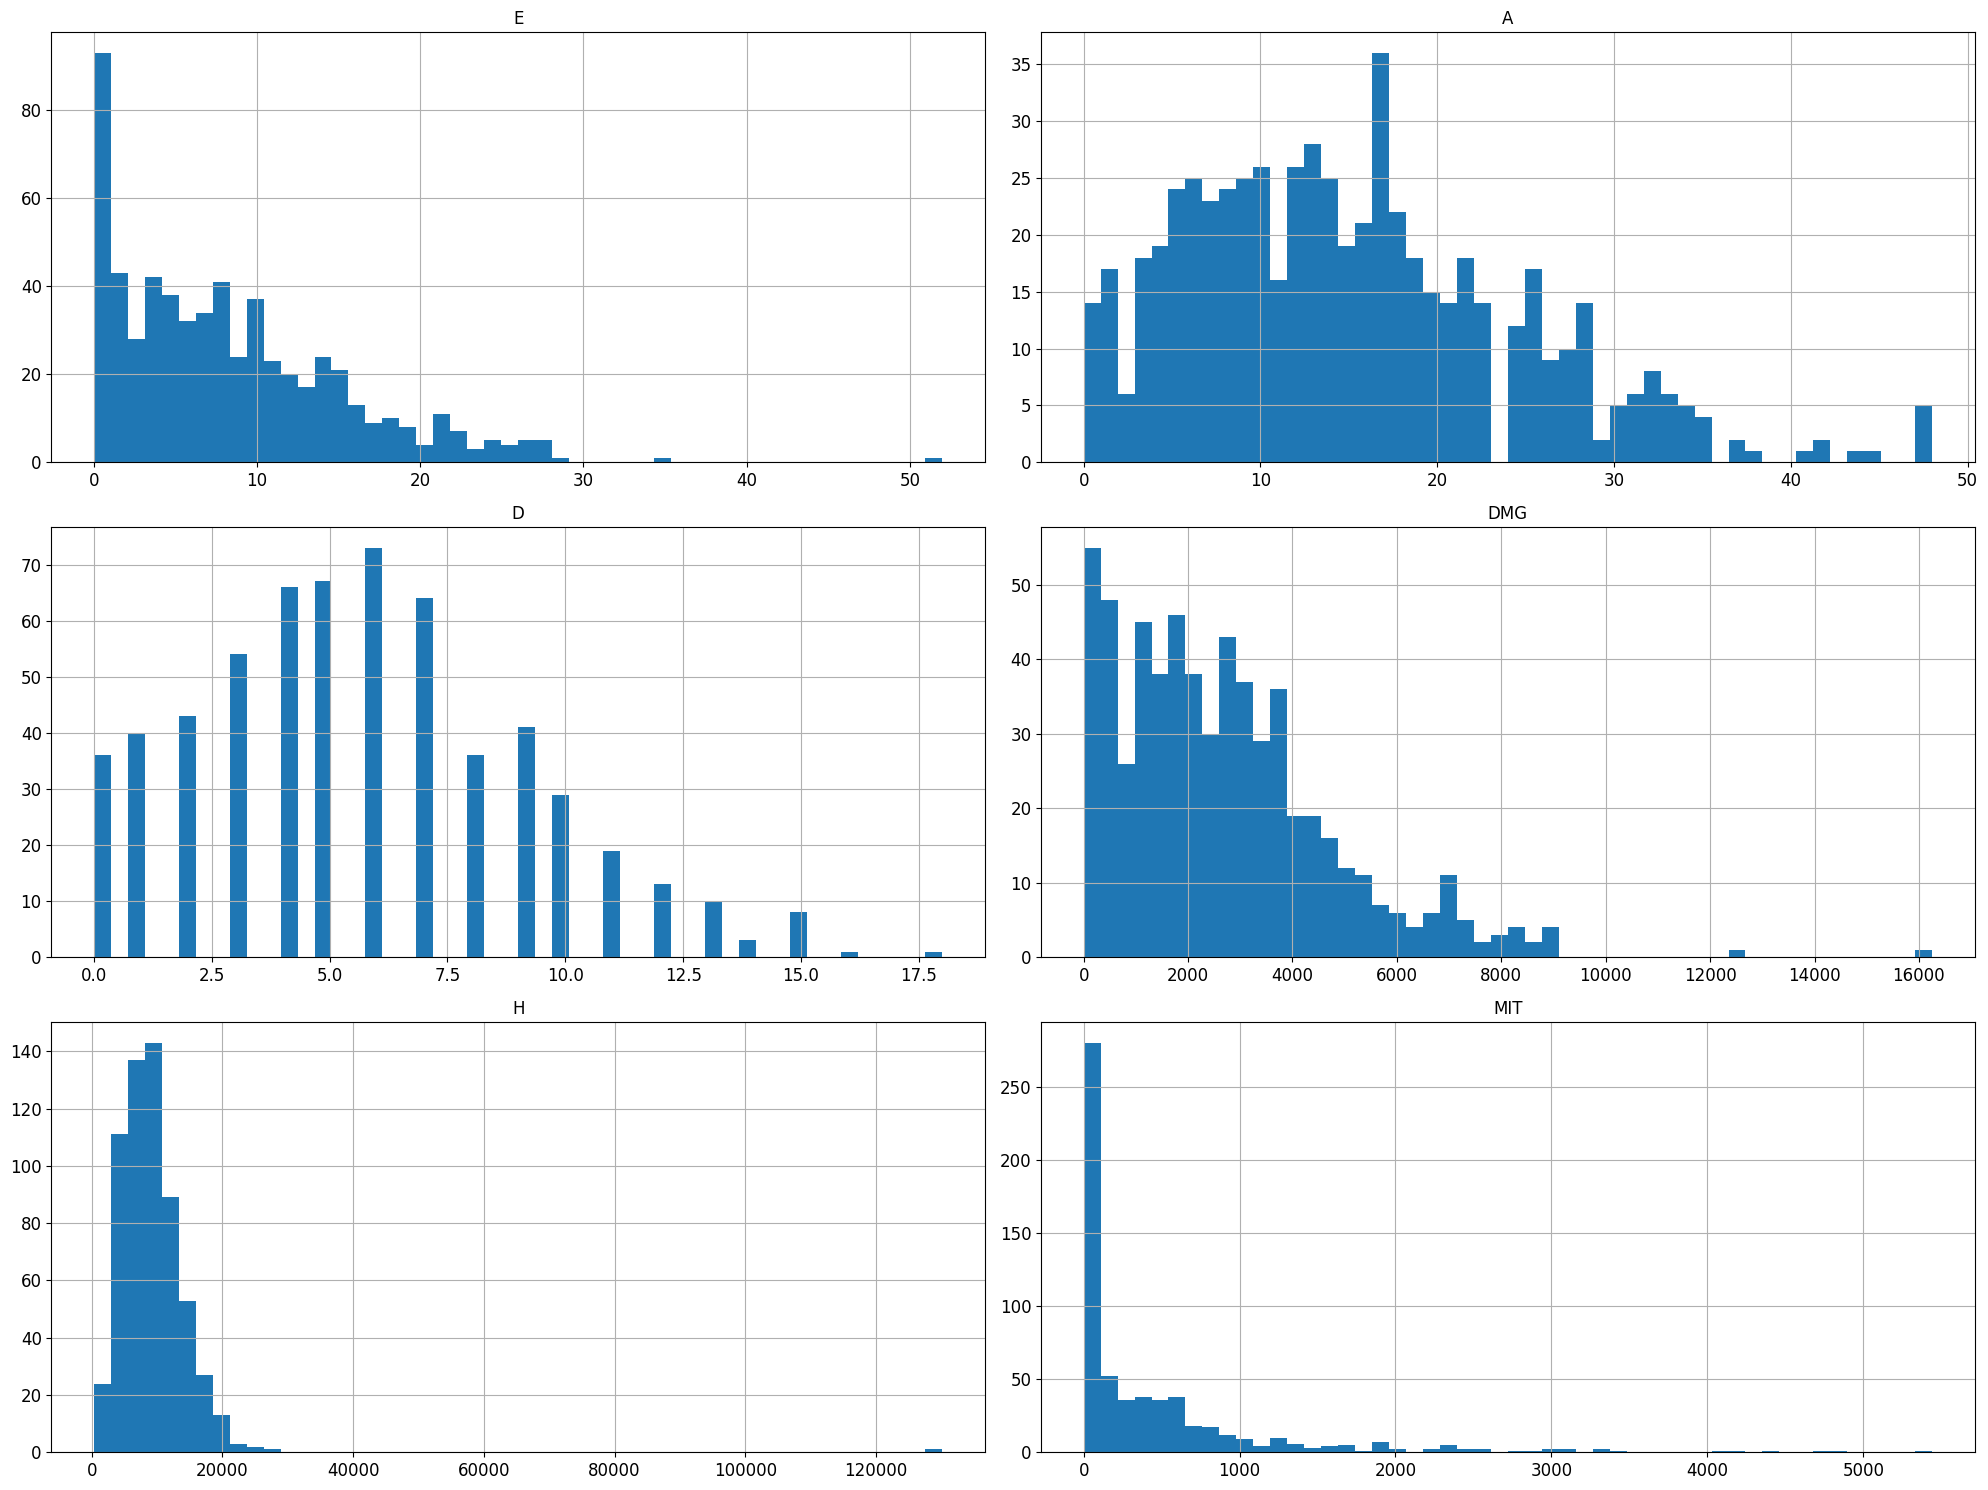

In [8]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [9]:
from sklearn import utils

index = scoreboards.index
scoreboards = scoreboards.loc[utils.shuffle(range(len(index) // players))]
scoreboards

E   A   D    DMG      H   MIT     GAME
190 0  40  16   4  15593      0  5438  VICTORY
    1  27   9   5  11771   1643     0  VICTORY
    2  32   4   8  16725    110     0  VICTORY
    3   3  32   6    140  18562     0  VICTORY
    4  15  20  11   4405  10540    49  VICTORY
...    ..  ..  ..    ...    ...   ...      ...
12  5  21   7   4  12387   2759  4257  VICTORY
    6  19   2   5   7828      0   793  VICTORY
    7  22   1   9  10883      0     0  VICTORY
    8   1  21   4   1685   7274     0  VICTORY
    9   3  13   3   2518  11644   632  VICTORY

[3020 rows x 7 columns]

In [10]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [11]:
from sklearn import preprocessing

X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), index, X.columns)
X

E         A         D       DMG         H       MIT
0   0  0.714286  0.333333  0.190476  0.531205  0.000000  0.129943
    1  0.482143  0.187500  0.238095  0.401002  0.012622  0.000000
    2  0.571429  0.083333  0.380952  0.569769  0.000845  0.000000
    3  0.053571  0.666667  0.285714  0.004769  0.142594  0.000000
    4  0.267857  0.416667  0.523810  0.150065  0.080969  0.001171
...         ...       ...       ...       ...       ...       ...
301 5  0.375000  0.145833  0.190476  0.421987  0.021195  0.101723
    6  0.339286  0.041667  0.238095  0.266676  0.000000  0.018949
    7  0.392857  0.020833  0.428571  0.370750  0.000000  0.000000
    8  0.017857  0.437500  0.190476  0.057403  0.055879  0.000000
    9  0.053571  0.270833  0.142857  0.085780  0.089450  0.015102

[3020 rows x 6 columns]

In [12]:
features = X.shape[-1]
X = X.values.reshape(-1, players * features)
print(X.shape)
print(y.shape)

(302, 60)
(302,)


In [13]:
from sklearn import ensemble, linear_model, neighbors, neural_network, svm, tree, model_selection
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=600, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(2., n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=2000),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(nu=.06),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(RidgeClassifier(), 0.9105464480874316),
 (RidgeClassifierCV(), 0.9105464480874316),
 (ExtraTreesClassifier(n_jobs=-1), 0.9072131147540985),
 (SVC(), 0.9072131147540983),
 (KNeighborsClassifier(n_jobs=-1), 0.9039890710382513),
 (LinearSVC(dual='auto'), 0.9007103825136612),
 (RandomForestClassifier(n_jobs=-1), 0.8973224043715847),
 (LogisticRegression(n_jobs=-1), 0.8973224043715847),
 (MLPClassifier(max_iter=2000), 0.8973224043715847),
 (LogisticRegressionCV(max_iter=600, n_jobs=-1), 0.8940983606557376),
 (BaggingClassifier(n_jobs=-1), 0.8908196721311474),
 (Perceptron(n_jobs=-1), 0.8842622950819672),
 (HistGradientBoostingClassifier(), 0.8840983606557377),
 (NearestCentroid(), 0.8807103825136613),
 (SGDClassifier(n_jobs=-1), 0.8776502732240438),
 (NuSVC(nu=0.06), 0.877431693989071),
 (GradientBoostingClassifier(), 0.8740983606557376),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8640983606557378),
 (DecisionTreeClassifier(), 0.8078142076502732),
 (ExtraTreeClassifier(), 0.7681967213114

In [14]:
from sklearn import manifold

X2D = manifold.LocallyLinearEmbedding(n_neighbors=3, n_jobs=-1).fit_transform(X)
scores_2D = [(estimator, model_selection.cross_val_score(estimator, X2D, y, n_jobs=-1).mean()) for estimator in estimators]
scores_2D.sort(key=operator.itemgetter(1), reverse=True)
scores_2D

[(MLPClassifier(max_iter=2000), 0.9138251366120219),
 (SVC(), 0.9138251366120219),
 (LogisticRegressionCV(max_iter=600, n_jobs=-1), 0.9072131147540983),
 (KNeighborsClassifier(n_jobs=-1), 0.8973224043715847),
 (NearestCentroid(), 0.8905464480874317),
 (RidgeClassifierCV(), 0.8872677595628415),
 (SGDClassifier(n_jobs=-1), 0.8871584699453552),
 (HistGradientBoostingClassifier(), 0.8707650273224044),
 (ExtraTreesClassifier(n_jobs=-1), 0.8674316939890712),
 (RandomForestClassifier(n_jobs=-1), 0.8642076502732241),
 (GradientBoostingClassifier(), 0.8641530054644809),
 (BaggingClassifier(n_jobs=-1), 0.8575409836065575),
 (LinearSVC(dual='auto'), 0.857431693989071),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8511475409836067),
 (DecisionTreeClassifier(), 0.8509836065573773),
 (Perceptron(n_jobs=-1), 0.850655737704918),
 (RidgeClassifier(), 0.8440437158469944),
 (ExtraTreeClassifier(), 0.8343715846994535),
 (NuSVC(nu=0.06), 0.8282513661202187),
 (LogisticRegression(n_jobs=-1), 0.77442622950819

In [15]:
defeats = len(defeat) // players
defeats_draws = defeats + len(draw) // players


def find_index(index):
    index = y[index:index + 1].index[0][0]
    if index < defeats:
        print(f'DEFEAT ({index + 1})')
    elif index < defeats_draws:
        print(f'DRAW ({index - defeats + 1})')
    else:
        print(f'VICTORY ({index - defeats_draws + 1})')
    return index

In [16]:
for i, (y_true, y_pred) in enumerate(zip(y, model_selection.cross_val_predict(scores_2d[0][0], X2D, y, n_jobs=-1))):
    if y_true != y_pred:
        print(scoreboards.loc[find_index(i)], end='\n\n')

DEFEAT (34)
    E   A   D    DMG      H    MIT     GAME
0  23   7  10  15259      0  13527   DEFEAT
1  25   1  13   9826    285     55   DEFEAT
2  31   5   8  12041    179      0   DEFEAT
3  12  25   4   5057  12697      0   DEFEAT
4  24  20   6   8733  13903      0   DEFEAT
5  24   4   6  13289     82  17859  VICTORY
6  18   0  14   9755      0    232  VICTORY
7  24   1  13  14930      0      0  VICTORY
8  13  13  11   3618  15470    830  VICTORY
9   9  25  10   2557  17752      0  VICTORY

DEFEAT (118)
    E   A   D    DMG      H    MIT     GAME
0  30   9   7  11316      0  13530   DEFEAT
1  30   0   2  13372    199    995   DEFEAT
2  32   1  12  14234   1108     75   DEFEAT
3  23  24   6   5323   9566   3143   DEFEAT
4  19  27   6   3600  10332   1163   DEFEAT
5  20   2  11  10721      0  21730  VICTORY
6  14   7  13   8946   1415   1155  VICTORY
7  17   0  11   9769    400     28  VICTORY
8   9  18   8   2297  12876    867  VICTORY
9  11  18   9   3804  16537      0  VICTORY

DEFEA

In [17]:
import joblib

for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        print(estimator)
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances[tanks] = importances[tanks].sum(0) / 2
        importances[damages] = importances[damages].sum(0) / 4
        importances[supports] = importances[supports].sum(0) / 4
        joblib.dump(importances, 'importances.joblib')

        importances_tanks = importances[tanks].sum(0)
        importances_damages = importances[damages].sum(0) / 2
        importances_supports = importances[supports].sum(0) / 2

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tanks, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damages, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_supports, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tanks.sum(), importances_damages.sum(), importances_supports.sum()), ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance * 100:.0f}%')

        break

ExtraTreesClassifier(n_jobs=-1)

**특성 중요도**
죽음: 29%
처치: 26%
도움: 22%
피해: 10%
경감: 6%
치유: 6%

**1인 돌격 특성 중요도**
죽음: 9%
처치: 8%
도움: 5%
피해: 2%
경감: 1%
치유: 1%

**1인 공격 특성 중요도**
처치: 6%
죽음: 5%
피해: 2%
도움: 2%
치유: 1%
경감: 1%

**1인 지원 특성 중요도**
도움: 7%
죽음: 5%
처치: 3%
치유: 1%
경감: 1%
피해: 1%

**1인 역할 중요도**
돌격: 26%
지원: 19%
공격: 18%


In [61]:
index = 264
print(scoreboards.loc[find_index(index)])

scoreboard = X[index].reshape(players, features).copy()
scoreboard[:, 2] = 1 - scoreboard[:, 2]
scoreboard[[0, 5]] *= importances_tanks / 2
scoreboard[[1, 2, 6, 7]] *= importances_damages / 2
scoreboard[[3, 4, 8, 9]] *= importances_supports / 2

shares = scoreboard.sum(1)
contributions = shares / scoreboard.sum()

print('\n**기여도**')
print(f'TEAM 1:', end='')
for contribution in contributions[:5]:
    print(f' {contribution:.2%}', end='')
print(f'\nTEAM 2:', end='')
for contribution in contributions[5:]:
    print(f' {contribution:.2%}', end='')

shares /= ((shares[[0, 5]].sum(),) + (shares[[1, 2, 6, 7]].sum(),) * 2 + (shares[[3, 4, 8, 9]].sum(),) * 2) * 2
shares *= ((2,) + (4,) * 4) * 2

print('\n\n**기여몫**')
print(f'TEAM 1:', end='')
for share in shares[:5]:
    print(f' {share:.2f}', end='')
print(f'\nTEAM 2:', end='')
for share in shares[5:]:
    print(f' {share:.2f}', end='')

VICTORY (92)
    E   A  D   DMG     H   MIT     GAME
0  13   5  5  7511     0  7387  VICTORY
1  15   0  4  6621     0     0  VICTORY
2  12   0  7  5791     0  2495  VICTORY
3   4   8  7  1087  7724   152  VICTORY
4  14   6  4  5153  9580     0  VICTORY
5  16   3  3  9841     0  7659   DEFEAT
6  18   1  8  6556     0    55   DEFEAT
7  12   1  3  5075   378   104   DEFEAT
8  10  10  5  3613  7446   128   DEFEAT
9   7  12  5  1819  8644   636   DEFEAT

**기여도**
TEAM 1: 19.98% 6.81% 5.67% 6.72% 8.51%
TEAM 2: 22.63% 6.36% 6.51% 8.39% 8.41%

**기여몫**
TEAM 1: 0.94 1.07 0.89 0.84 1.06
TEAM 2: 1.06 1.00 1.03 1.05 1.05

In [21]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(60, 'relu', input_shape=[60]))
model.add(layers.Dense(58, 'relu'))
model.add(layers.Dense(38, 'relu'))
model.add(layers.Dense(3, 'softmax'))
model.summary()

2023-09-25 13:32:48.882689: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 13:32:52.203199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-25 13:32:52.447075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-25 13:32:52.447322: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 58)                3538      
                                                                 
 dense_2 (Dense)             (None, 38)                2242      
                                                                 
 dense_3 (Dense)             (None, 3)                 117       
                                                                 
Total params: 9557 (37.33 KB)
Trainable params: 9557 (37.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from tensorflow.keras import optimizers, callbacks

encoder = preprocessing.LabelEncoder()
model.compile(optimizers.Adamax(), 'sparse_categorical_crossentropy', ['accuracy'])
history = model.fit(
    X,
    encoder.fit_transform(y),
    epochs=100000,
    verbose=2,
    callbacks=[callbacks.EarlyStopping(patience=15, restore_best_weights=True)],
    validation_split=.1
)
history.history['val_loss'][-16], history.history['val_accuracy'][-16]

Epoch 1/100000


2023-09-25 13:32:57.378958: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-25 13:32:57.591298: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x34158530 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-25 13:32:57.591342: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-09-25 13:32:57.682572: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-25 13:33:00.458812: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-09-25 13:33:00.664578: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-25 13:33:00.845497

9/9 - 7s - loss: 1.0445 - accuracy: 0.4908 - val_loss: 0.9799 - val_accuracy: 0.5806 - 7s/epoch - 750ms/step
Epoch 2/100000
9/9 - 0s - loss: 0.9632 - accuracy: 0.4945 - val_loss: 0.9187 - val_accuracy: 0.5806 - 57ms/epoch - 6ms/step
Epoch 3/100000
9/9 - 0s - loss: 0.9022 - accuracy: 0.4945 - val_loss: 0.8659 - val_accuracy: 0.6129 - 60ms/epoch - 7ms/step
Epoch 4/100000
9/9 - 0s - loss: 0.8441 - accuracy: 0.5166 - val_loss: 0.8156 - val_accuracy: 0.7097 - 189ms/epoch - 21ms/step
Epoch 5/100000
9/9 - 0s - loss: 0.7859 - accuracy: 0.6753 - val_loss: 0.7598 - val_accuracy: 0.8710 - 62ms/epoch - 7ms/step
Epoch 6/100000
9/9 - 0s - loss: 0.7195 - accuracy: 0.8229 - val_loss: 0.7092 - val_accuracy: 0.9677 - 68ms/epoch - 8ms/step
Epoch 7/100000
9/9 - 0s - loss: 0.6579 - accuracy: 0.8561 - val_loss: 0.6610 - val_accuracy: 0.9677 - 53ms/epoch - 6ms/step
Epoch 8/100000
9/9 - 0s - loss: 0.6079 - accuracy: 0.8598 - val_loss: 0.6203 - val_accuracy: 0.9677 - 53ms/epoch - 6ms/step
Epoch 9/100000
9/9 - 

(0.0174135509878397, 1.0)

In [45]:
import numpy as np

predictions = encoder.inverse_transform(np.argmax(model.predict(X), 1))
for i, (y_true, y_pred) in enumerate(zip(y, predictions)):
    if y_true != y_pred:
        find_index(i)

10/10 [==============================] - 0s 2ms/step
VICTORY (36)
DEFEAT (45)
DEFEAT (14)
VICTORY (92)


In [57]:
probas = model.predict(X)
for i, (y_true, y_pred) in enumerate(zip(y, predictions)):
    if y_true != y_pred:
        find_index(i)
        print(f'{i} 패배 확률: {probas[i][0] * 100:.0f}%, 승리 확률: {probas[i][2] * 100:.0f}%')

10/10 [==============================] - 0s 2ms/step
VICTORY (36)
72 패배 확률: 58%, 승리 확률: 42%
DEFEAT (45)
116 패배 확률: 49%, 승리 확률: 51%
DEFEAT (14)
182 패배 확률: 48%, 승리 확률: 52%
VICTORY (92)
264 패배 확률: 63%, 승리 확률: 37%
